# Processing OM10 systems with a null-deblender

In this notebook, we will discuss how we could process OM10 lensed systems with a null-deblender. 

## Requirements

OM10 and SLRealizer are the only requirements.

In [1]:
import om10
import desc.slrealizer
import warnings
warnings.filterwarnings("ignore")

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


After importing the packages, we have to load the OM10 catalog. We will query the systems that satisfy the criteria : `maglim=23.3,area=18000.0,IQ=0.75`.

In [2]:
db = om10.DB()
db.select_random(maglim=23.3,area=18000.0,IQ=0.75)
db.paint(synthetic=True)
realizer = desc.slrealizer.SLRealizer(catalog=db, observation="../../../data/twinkles_observation_history.csv")

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: selection yields 2813 lenses


Here we are enabling the inline options for matplotlib and pylab so that we can see the plot in the jupyter notebook.

In [3]:
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Populating the interactive namespace from numpy and matplotlib


This process is not strictly necessary, but here we are choosing a good lens system, with large image separations and full four images.

In [4]:
wide = db.sample[np.where(db.sample['IMSEP'] > 1.0)]
print "Number of lenses with image separation > 1.0 arcsec = ",len(wide)

wide_quads = wide[np.where(wide['NIMG'] == 4)]
print "Number of these with 4 images = ",len(wide_quads)

bright_wide_quads = wide[np.where(wide_quads['MAGI'] < 22)]
print "Number of these with i3 < 22 = ",len(bright_wide_quads)

db.sample = bright_wide_quads    
                      
k = db.sample[0]['LENSID']

Number of lenses with image separation > 1.0 arcsec =  1934
Number of these with 4 images =  295
Number of these with i3 < 22 =  141


Then, we call the method `deblend` in the SLRealizer package. We need to specify the lensID and whether we want to null_deblend the objects. This method uses `skimage.measure.moments` method and plots both the original array and null-deblended array.

OM10: Extracted OM10 lens number 12087689:
 LENSID  FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
-------- -------- ---- ----- ... ------------- ------------- -------------
12087689        0    2 0.682 ...         22.73 22.7330457261 23.0716347858
##################### PLOTTING ALL SOURCES ##################################


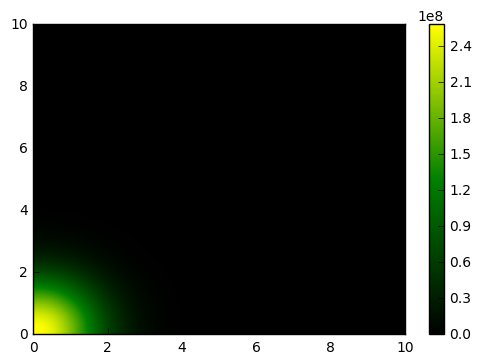

('first:', 646327395.31510282, 0.097876708589868217, 0.09673887213073161, array([[ 0.53264841,  0.00114753],
       [ 0.00114753,  0.52244479]]))
##################### AFTER NULL DEBLENDING ##################################


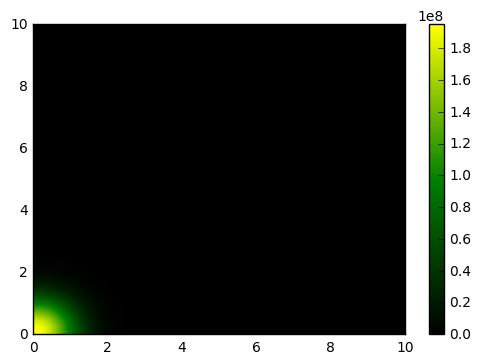

##################### DEBLENDING DEBLENDED OBJECT #################################
('first:', 19827339969.911358, 0.61949194562910559, 0.61344944223666487, array([[  2.09989191e+01,   1.41818340e-02],
       [  1.41818340e-02,   2.05934968e+01]]))


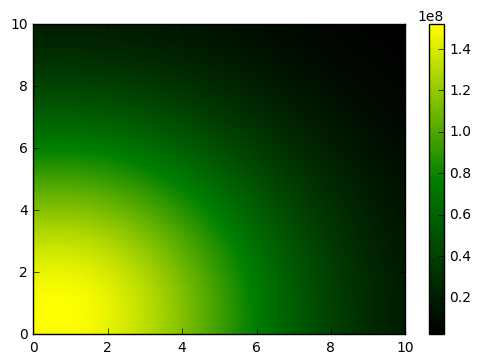

##################### DEBLENDING DEBLENDED OBJECT #################################
('first:', 565533379804.15479, 3.5939301841922342, 3.5713382627738, array([[  6.09523039e+02,   6.97675381e-02],
       [  6.97675381e-02,   6.04443655e+02]]))


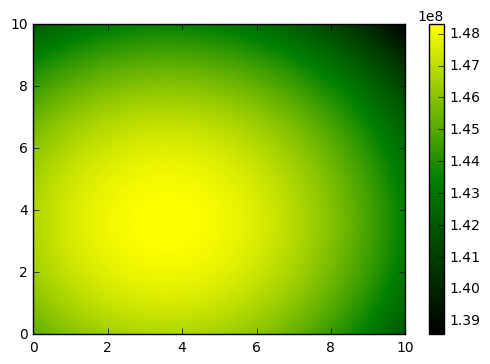

##################### DIFFERENCE BETWEEN TWO IMAGES ##################################


ValueError: operands could not be broadcast together with shapes (1000,1000) (10000,10000) 

In [5]:
realizer.deblend(lensID=k, null_deblend=True)